In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Plan i program

- Za PreviousAdmissionDays moramo zamjeniti -8 s medijanom i normalizirati
- Weight_Discharge, i Height_Discharge moramo:
    - ispraviti raspone tako da ocito krive vrijednosti zamjenimo s medijanom
    - normalizirati
- LOS, Surgery_Count, i LOS_ICU treba samo normalizirati
- Age_Group treba pretvoriti u numericku varijablu 1, 2, 3, ...., N i normalizirati
- varijable ljekova zdruziti u skupine ljekova po slicnosti indikacija
- sve kategoricke varijable one-hot enkodirati

In [3]:
df = pd.read_csv('../data/train.csv', index_col=0)
df_test = pd.read_csv('../data/test.csv', index_col=0)
print(f"df.shape: {df.shape}")
print(f"df_test.shape: {df_test.shape}")

df.shape: (28587, 274)
df_test.shape: (7336, 276)


In [4]:
all = pd.concat([df, df_test])
print(f"all.shape: {all.shape}")

all.shape: (35923, 276)


In [5]:
numerical_cols=[
    'PreviousAdmissionDays',
    'LOS',
    'Surgery_Count',
    'LOS_ICU',
    'Weight_Discharge',
    'Height_Discharge'
]
all[numerical_cols].describe()

,PreviousAdmissionDays,LOS,Surgery_Count,LOS_ICU,Weight_Discharge,Height_Discharge
count,35923.000000,35923.000000,35923.000000,35923.000000,35923.000000,35923.000000
mean,1015.737995,4.061326,0.193386,0.118086,81.988513,164.477368
std,1733.384865,6.338537,0.422212,2.337647,82.550324,140.689627
min,-8.000000,1.000000,0.000000,0.000000,-8.000000,-8.000000
25%,-8.000000,2.000000,0.000000,0.000000,72.000000,164.000000
50%,48.000000,2.000000,0.000000,0.000000,84.000000,171.000000
75%,1327.000000,4.000000,0.000000,0.000000,95.000000,178.000000
max,9254.000000,304.000000,5.000000,118.000000,8936.900000,18584.000000


## Weight experiment hyperparameters

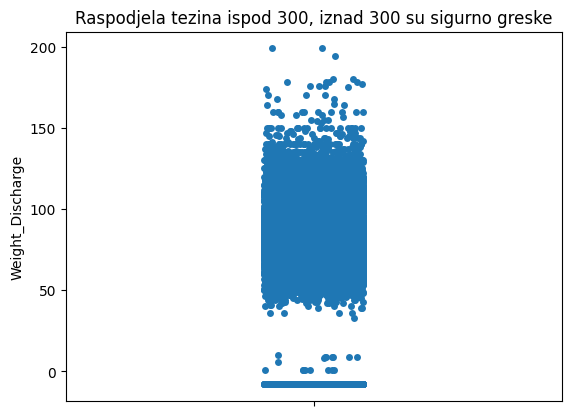

In [6]:
sns.stripplot(y='Weight_Discharge', data=all[all.Weight_Discharge <= 300])
plt.title('Raspodjela tezina ispod 300, iznad 300 su sigurno greske')
plt.show()

Veliki pojas u sredini predstavlja normalan raspon.

In [7]:
print(f"Najveća normalna tezina u datasetu: {all[all.Weight_Discharge <= 300].Weight_Discharge.max()}")
print(f"Najmanja normalna tezina u datasetu: {all[all.Weight_Discharge > 25].Weight_Discharge.min()}")

Najveća normalna tezina u datasetu: 199.0
Najmanja normalna tezina u datasetu: 33.0


In [8]:
weight_median = all[
    (all.Weight_Discharge <= 300) & 
    (all.Weight_Discharge > 25)
].groupby('Gender').Weight_Discharge.median()
weight_median

Gender
M    90.0
Ž    75.0
Name: Weight_Discharge, dtype: float64

In [9]:
# To be used for gender missing median
all[
    (all.Weight_Discharge <= 300) & 
    (all.Weight_Discharge > 25)
].Weight_Discharge.median()

85.0

In [ ]:
# Proposed experiemnt hyperparams for weight
WEIGHT_MEDIAN_MALE = 90
WEIGHT_MEDIAN_FEMALE = 75
WEIGHT_MEDIAN_GENDER_MISSING = 85
WEIGHT_LOWER_LIM = 33
WEIGHT_UPPER_LIM = 199

## Height experiment hyperparameters

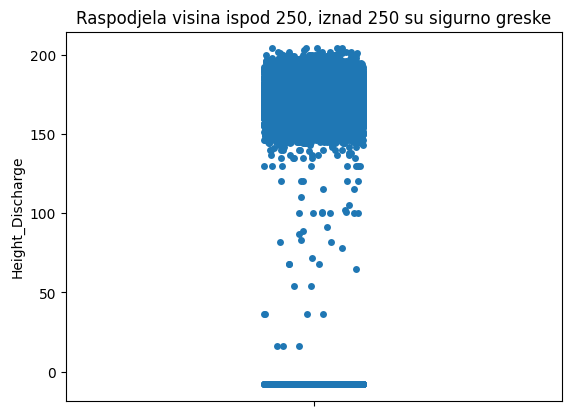

In [10]:
sns.stripplot(y='Height_Discharge', data=all[all.Height_Discharge <= 250])
plt.title('Raspodjela visina ispod 250, iznad 250 su sigurno greske')
plt.show()

Veliki pojas u sredini predstavlja normalan raspon.

In [13]:
print(f"Najveća normalna visina u datasetu: {all[all.Height_Discharge <= 250].Height_Discharge.max()}")
print(f"Najmanja normalna visina u datasetu: {all[all.Height_Discharge > 120].Height_Discharge.min()}")

Najveća normalna visina u datasetu: 204.0
Najmanja normalna visina u datasetu: 130.0


In [16]:
all[
    (all.Height_Discharge <= 250) & 
    (all.Height_Discharge > 120)
].groupby('Gender').Height_Discharge.median()

Gender
M    176.0
Ž    162.0
Name: Height_Discharge, dtype: float64

In [17]:
all[
    (all.Height_Discharge <= 250) & 
    (all.Height_Discharge > 120)
].Height_Discharge.median()

172.0

In [ ]:
# Proposed experiemnt hyperparams for height
HEIGHT_MEDIAN_MALE = 176
HEIGHT_MEDIAN_FEMALE = 162
HEIGHT_MEDIAN_GENDER_MISSING = 172
HEIGHT_LOWER_LIM = 130
HEIGHT_UPPER_LIM = 204

## PreviousAdmissionDays hyperparams

In [20]:
all[
    all.PreviousAdmissionDays != -8
].PreviousAdmissionDays.describe()

count    19742.000000
mean      1854.817344
std       1975.924014
min          1.000000
25%        203.000000
50%       1055.000000
75%       3129.000000
max       9254.000000
Name: PreviousAdmissionDays, dtype: float64

In [21]:
all[
    all.PreviousAdmissionDays != -8
].PreviousAdmissionDays.median()

1055.0

In [22]:
# Proposed experiemnt hyperparams for PreviousAdmissionDays
PREV_ADM_DAYS_MEDIAN = 1055